In [1]:
!pip install pandas-profiling

In [2]:
import pandas as  pd
from pandas_profiling import ProfileReport
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
##we are using pandas-profiling it can be used for quick EDA 
### To Create the Simple report quickly
train.profile_report()

In [4]:
###dabl is a library to help with data cleaning and EDA
!pip install dabl

     |████████████████████████████████| 566 kB 598 kB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572788 sha256=3c4311ec6e91357e66c8e00b34eb7ee4b0987cc397e7014a9d20600e6dabb9b4
  Stored in directory: /root/.cache/pip/wheels/aa/38/8f/66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl


In [6]:
import dabl
df_clean = dabl.clean(train, verbose=0)

In [7]:
types = dabl.detect_types(df_clean)
print(types) 

               continuous  dirty_float  low_card_int  categorical   date  \
MSSubClass          False        False          True        False  False   
MSZoning            False        False         False         True  False   
LotFrontage          True        False         False        False  False   
LotArea              True        False         False        False  False   
Alley               False        False         False         True  False   
...                   ...          ...           ...          ...    ...   
MoSold              False        False          True        False  False   
YrSold              False        False         False         True  False   
SaleType            False        False         False         True  False   
SaleCondition       False        False         False         True  False   
SalePrice            True        False         False        False  False   

               free_string  useless  
MSSubClass           False    False  
MSZoning   

Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 45 categorical features


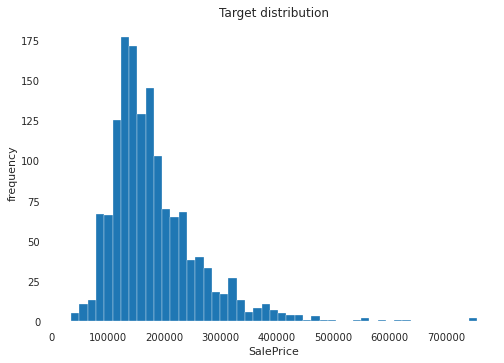

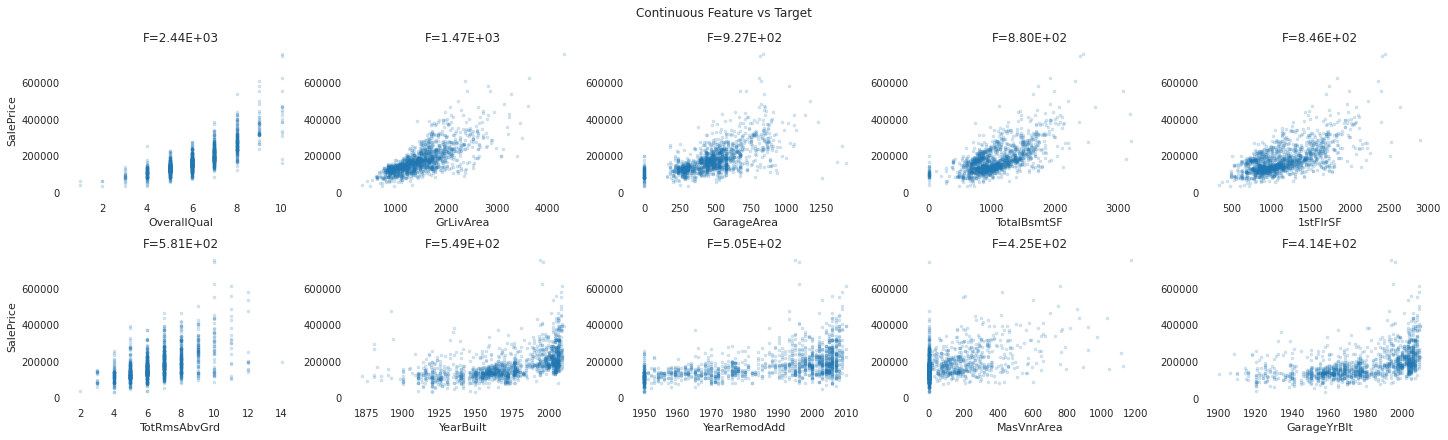

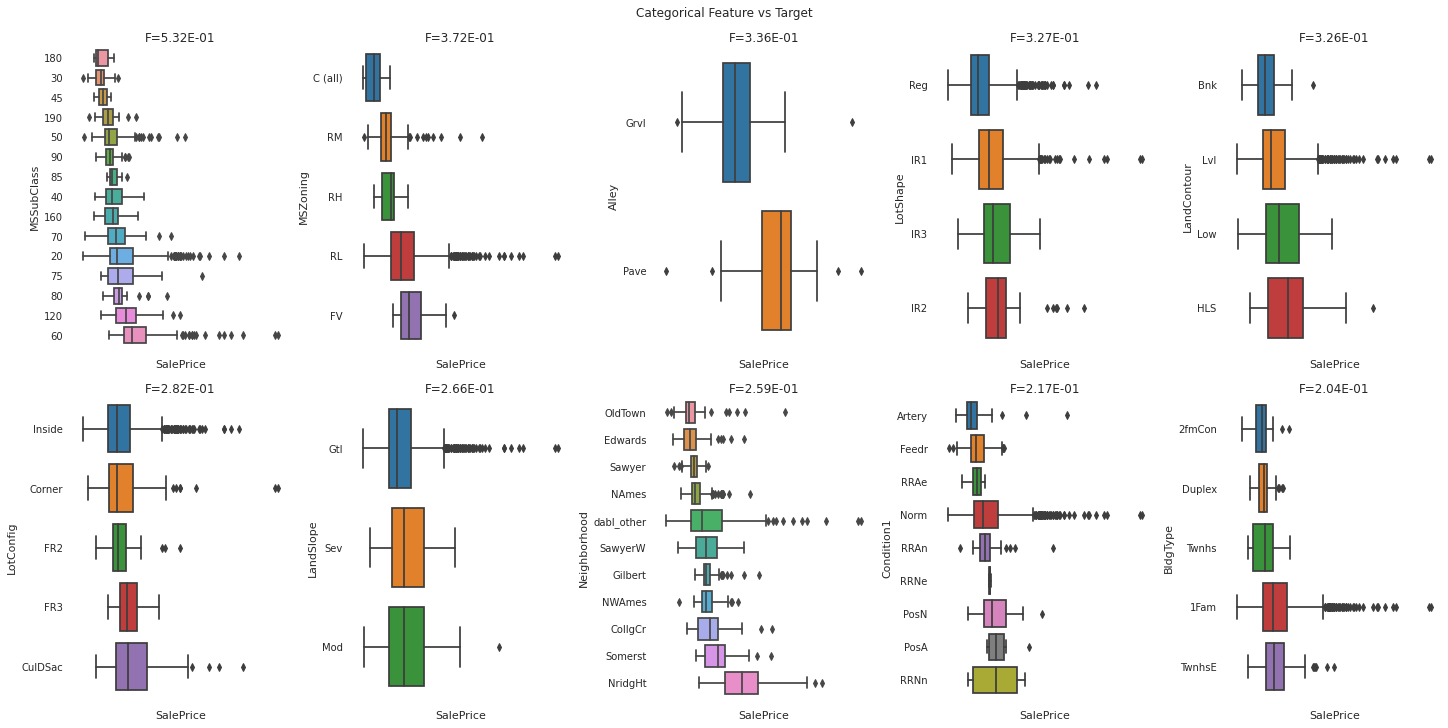

In [9]:
dabl.plot(train, 'SalePrice')

In [14]:
##pycaret for automatic modelling
!pip install pycaret

     |████████████████████████████████| 248 kB 586 kB/s eta 0:00:01
     |████████████████████████████████| 258 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 25.0 MB/s eta 0:00:01
     |████████████████████████████████| 326 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.5 MB/s  eta 0:00:01


     |████████████████████████████████| 1.1 MB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 34.0 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 2.7 MB/s  eta 0:00:01


     |████████████████████████████████| 45 kB 2.2 MB/s  eta 0:00:01
  Created wheel for pyod: filename=pyod-0.8.3-py3-none-any.whl size=110347 sha256=2198bf3d29ec53620a04443d493134eab518f59124957f363c6f520b7a1aa043
  Stored in directory: /root/.cache/pip/wheels/fc/fc/77/6e530134c9ee2b45ef0840f0c8046b3be595624881cf533d7a
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-py3-none-any.whl size=17157 sha256=1bdb4201f0d8b73496b21546ad3e813eacbfa7433768649a518181a4bd5ff5ad
  Stored in directory: /root/.cache/pip/wheels/c4/b6/b5/e76659f3b2a3a226565e27f0a7eb7a3ac93c3f4d68acfbe617
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.13-cp37-cp37m-linux_x86_64.whl size=1221852 sha256=ec5a17d862c03e7cb402261e188e8c3d9c1f7ff769ab723b05cb4e62a25f6e20
  Stored in directory: /root/.cache/pip/wheels/b9/ba/77/163f10f14bd489351530603e750c195b0ceceed2f3be2b32f1
  Created wheel for databricks-cli: filename=databricks_cli-0.13.0-py3-none-any.whl size=100345 sha256=

In [15]:
##creating a dev dataset
dataset = train.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = train.drop(dataset.index).reset_index(drop=True)

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1460, 81)
Unseen Data For Predictions: (73, 81)


In [16]:
#import regression module from pycaret
from pycaret.regression import *
exp_clf = setup(data=train, target="SalePrice")

,Description,Value
0,session_id,6746
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 412)"


In [17]:
##to compare various model
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15740.7903,902279964.2794,28151.4106,0.8644,0.1305,0.0902,5.1820
gbr,Gradient Boosting Regressor,17126.5095,948573865.9210,28952.7042,0.8549,0.1383,0.0993,0.3880
lightgbm,Light Gradient Boosting Machine,17206.6524,982657672.3485,29733.1445,0.8495,0.1422,0.0990,0.1370
xgboost,Extreme Gradient Boosting,18391.6437,1091665264.0000,31181.6926,0.8346,0.1471,0.1048,1.1190
rf,Random Forest Regressor,18281.0229,1066594793.8788,31273.4885,0.8336,0.1521,0.1069,1.4850
omp,Orthogonal Matching Pursuit,18093.5096,1373885524.0303,34157.0876,0.7874,0.1739,0.1065,0.0170
ridge,Ridge Regression,19533.2850,1426443401.6000,35266.0779,0.7724,0.1818,0.1172,0.0240
lasso,Lasso Regression,19640.2553,1495478502.4000,35963.3125,0.7638,0.1995,0.1174,0.0980
ada,AdaBoost Regressor,25748.4852,1542943881.4148,38183.5717,0.7545,0.2110,0.1689,0.2530
en,Elastic Net,20477.6747,1631799328.0000,37457.6641,0.7397,0.1652,0.1189,0.1100


In [18]:
model = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16431.0703,704092003.4909,26534.7320,0.8551,0.1305,0.0879
1,13211.2644,364450134.8902,19090.5771,0.9184,0.1090,0.0831
2,19057.3173,1150760655.3129,33922.8633,0.8374,0.1582,0.1126
3,22076.6215,3230712569.8272,56839.3576,0.6821,0.1603,0.1000
4,16291.4192,753337749.9650,27446.9989,0.8199,0.1329,0.0959
5,12957.2172,773786138.2931,27817.0117,0.8873,0.1135,0.0709
6,13932.4036,403776409.8641,20094.1885,0.9170,0.1015,0.0775
7,12293.6030,398552557.5930,19963.7811,0.9178,0.1170,0.0808
8,16318.1641,559834258.0926,23660.8169,0.9252,0.1537,0.1059
9,14838.8221,683497165.4650,26143.7787,0.8839,0.1286,0.0874


In [22]:
# Tune the catboost model
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16872.9980,738713536.0000,27179.2852,0.8480,0.1404,0.0919
1,14634.9561,488133696.0000,22093.7480,0.8907,0.1176,0.0896
2,19828.2715,1389329024.0000,37273.7031,0.8037,0.1691,0.1186
3,22605.1543,2974760704.0000,54541.3672,0.7073,0.1611,0.1059
4,17663.0371,852438336.0000,29196.5469,0.7962,0.1454,0.1078
5,14245.8613,694632768.0000,26355.8867,0.8988,0.1231,0.0794
6,15618.0850,492136768.0000,22184.1562,0.8989,0.1092,0.0854
7,13272.3574,385373696.0000,19630.9375,0.9205,0.1213,0.0887
8,17667.3145,636282304.0000,25224.6367,0.9150,0.1507,0.1113
9,15848.9023,707491968.0000,26598.7207,0.8799,0.1326,0.0924


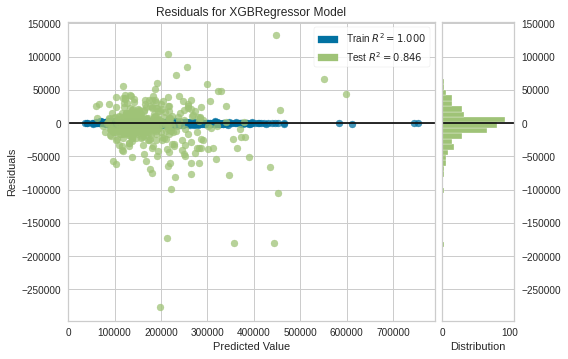

In [26]:
plot_model(model)